In [1]:
#Import pandas and read the dataset
import pandas as pd
col_names = ['ID', 'Limit_Bal', 'Gender', 'Education_lvl', 'Mar_status', 'Age', 'Pay_Sept', 'Pay_Aug', 'Pay_July', 'Pay_June',
            'Pay_May', 'Pay_April', 'Bill_amt_Sept', 'Bill_amt_Aug', 'Bill_amt_July', 'Bill_amt_June',
             'Bill_amt_May', 'Bill_amt_April', 'Pay_amt_Sept', 'Pay_amt_Aug', 'Pay_amt_July', 'Pay_amt_June', 'Pay_amt_May',
            'Pay_amt_April', 'Default_status']

data = pd.read_csv(r"C:\Users\Nkiru\Downloads\default_of_credit_card_clients.csv", names = col_names, header = 0, index_col = 'ID')

data.head()

,Limit_Bal,Gender,Education_lvl,Mar_status,Age,Pay_Sept,Pay_Aug,Pay_July,Pay_June,Pay_May,...,Bill_amt_June,Bill_amt_May,Bill_amt_April,Pay_amt_Sept,Pay_amt_Aug,Pay_amt_July,Pay_amt_June,Pay_amt_May,Pay_amt_April,Default_status
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Description
**work on columns X6, X7 and X11 use the idea of pivot column and change it**
**<p>X6** = the repayment status in September, 2005; </p>
**<p>X7** = the repayment status in August, 2005 </p>
**<p>X11** = the repayment status in April, 2005 </p>

The measurement scale for the repayment status is: 
-1 = pay duly; 
1 = payment delay for one month; 
2 = payment delay for two months; . . .; 
8 = payment delay for eight months; 
9 = payment delay for nine months and above.

<p>**X12-X17: Amount of bill statement (NT dollar).**</p>
<p>X12 = amount of bill statement in September, 2005;</p>
<p> X13 = amount of bill statement in August, 2005; . . .; </p>
<p> X17 = amount of bill statement in April, 2005. </p>

**X18-X23: Amount of previous payment (NT dollar).** 
<p> X18 = amount paid in September, 2005;</p>
<p> X19 = amount paid in August, 2005; . . .;</p>
<p> X23 = amount paid in April, 2005.</p>

In [2]:
data['Mar_status'].value_counts()

2    15964
1    13659
3      323
0       54
Name: Mar_status, dtype: int64

In [3]:
#test the datatype of a column
#isinstance(df['Gender'][10, float )

In [4]:
#Define wrangle function for preprocessing the data
#Change the gender column into 0(male), 1(Female)
#make the Default status, Payments statust columns to be objects dtypes
import numpy as np
def wrangle(X):
    #X = X.copy()
    
    #change gender to binary form 
    #X['Gender'] = X['Gender']-1
    #X = X.drop(columns = ['Pay_Sept', 'Pay_Aug', 'Pay_July', 'Pay_June', 'Pay_May', 'Pay_April'])
    
    #change datatypes of Gender, target variables, education level,  and others as objects
   # convert_dtype = {'Gender': object,  'Default_status': object, 'Gender':object }
    #X = X.astype(convert_dtype)
    
   #Change the category name to match what is expected
    X['Mar_status'] = X['Mar_status'].map({0: 'others', 1:'married', 2: 'single', 3: 'others'}) 
    X['Education_lvl'] = X['Education_lvl'].map({1: 'graduate school', 2:'university', 3: 'high school',
                                                  4: 'others', 0:'others', 6:'others'})
    #Create new features from the Amount of bill statement from September to April

   # X['Total_bill'] = X['Bill_amt_Sept'] + X['Bill_amt_Aug'] + X['Bill_amt_July'] +
#X['Bill_amt_June'] + X['Bill_amt_May'] + X['Bill_amt_April']
    #df['perk_count'] = df[perk_cols].sum(axis=1)
    
    bill_cols = ['Bill_amt_Sept', 'Bill_amt_Aug', 'Bill_amt_July', 'Bill_amt_June', 
                 'Bill_amt_June', 'Bill_amt_May', 'Bill_amt_April']
    pay_cols = ['Pay_amt_Sept', 'Pay_amt_Aug', 'Pay_amt_July', 'Pay_amt_June',
                'Pay_amt_May', 'Pay_amt_April']
    
    X['Total_bill'] = X[bill_cols].sum(axis = 1)
    X['Total_paid'] = X[pay_cols].sum(axis = 1)
    
    #Let's find difference betweenn what a customer has spent and what they have paid

    X['Bal'] = (X['Limit_Bal'] - X['Total_paid']) - (X['Limit_Bal'] - X['Total_bill'])
    
    #drop bill_cols and pay_cols to avoid data leakage
    X = X.drop(columns = bill_cols)
    X = X.drop(columns = pay_cols)

    
    
    return X

In [5]:
#aaply thr wrangle function on the dataset
df = wrangle(data)
print(df.shape)
df.head()

(30000, 15)


,Limit_Bal,Gender,Education_lvl,Mar_status,Age,Pay_Sept,Pay_Aug,Pay_July,Pay_June,Pay_May,Pay_April,Default_status,Total_bill,Total_paid,Bal
ID,,,,,,,,,,,,,,,
1,20000,2,university,married,24,2,2,-1,-1,-2,-2,1,7704,689,7015
2,120000,2,university,single,26,-1,2,0,0,0,2,1,20349,5000,15349
3,90000,2,university,single,34,0,0,0,0,0,0,0,115984,11018,104966
4,50000,2,university,married,37,0,0,0,0,0,0,0,259648,8388,251260
5,50000,1,university,married,57,-1,0,-1,0,0,0,0,130279,59049,71230


In [6]:
df.to_csv("C:\\Users\\Nkiru\\Downloads\\my_file.csv")


### Feature Engineering
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. 
<p>This study reviewed the literature and used the following 23 variables as explanatory variables:</p>
<p> X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. </p>
<p> X2: Gender (1 = male; 2 = female).</p>
<p> X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). </p>
<p> X4: Marital status (1 = married; 2 = single; 3 = others). </p>
<p> X5: Age (year). </p>
<p> X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. </p>
<p> X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.</p>
<p> X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. </p>

In [7]:
#Education level is supposed to be four unique values but it shows 7 unique values so lets work on it in the wrangle function

In [8]:
df.select_dtypes('object')

,Education_lvl,Mar_status
ID,,
1,university,married
2,university,single
3,university,single
4,university,married
5,university,married
...,...,...
29996,high school,married
29997,high school,single
29998,university,single


In [9]:
df.nunique()

Limit_Bal            81
Gender                2
Education_lvl         4
Mar_status            3
Age                  56
Pay_Sept             11
Pay_Aug              11
Pay_July             11
Pay_June             11
Pay_May              10
Pay_April            10
Default_status        2
Total_bill        27552
Total_paid        19180
Bal               26766
dtype: int64

In [10]:
df['Education_lvl'].value_counts()
#This feature will be dropped because they seem not have much things to t
df.columns

Index(['Limit_Bal', 'Gender', 'Education_lvl', 'Mar_status', 'Age', 'Pay_Sept',
       'Pay_Aug', 'Pay_July', 'Pay_June', 'Pay_May', 'Pay_April',
       'Default_status', 'Total_bill', 'Total_paid', 'Bal'],
      dtype='object')

In [11]:
#Create new features from the Amount of bill statement from September to April

#df['Total_bill'] = df['Bill_amt_Sept'] + df['Bill_amt_Aug'] + df['Bill_amt_July'] + df['Bill_amt_June'] 
#+ df['Bill_amt_May'] + df['Bill_amt_April']


In [12]:
#Lets get the total amount that a customer have paid from Sept - April
#df['Total_paid'] = df['Pay_amt_Sept'] + df['Pay_amt_Aug'] + df['Pay_amt_July'] + df['Pay_amt_June']+ df['Pay_amt_May'] + df['Pay_amt_April']


In [13]:
#Let's find difference betweenn what a customer has spent and what they have paid

#df['Bal'] = (df['Limit_Bal'] - df['Total_paid']) - (df['Limit_Bal'] - df['Total_bill'])
#df[df['Total_bill']<0]


### Perform Data Visualization

In [14]:
#Find the distribution of those that defaulted and those that didnt default
#rename that columns to default and non-default
#plot using Seaborn

Default_prop = pd.DataFrame(df['Default_status'].value_counts(normalize=True))
Default_perc = Default_prop * 100
Default_perc = Default_perc.rename(index ={0: 'Non-Default', 1: 'Defaulted'})
Default_perc

,Default_status
Non-Default,77.88
Defaulted,22.12


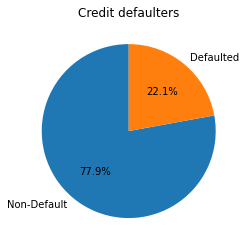

In [15]:
#Create the pie chart
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

#Autopct causes the percents to be rounded.  Startangle causes the starting place
#on the pie chart to be vertical
ax.pie(Default_perc['Default_status'], labels = Default_perc.index, autopct = '%1.1f%%', startangle=90)
ax.set_title('Credit defaulters')
###########

plt.show()

Text(0.5, 1.0, 'Gender distributions')

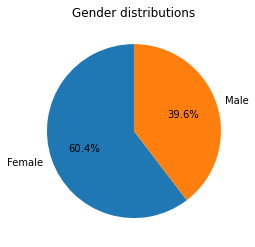

In [16]:
#find the relationship between age and default
fig, ax = plt.subplots()

#Autopct causes the percents to be rounded.  Startangle causes the starting place
#on the pie chart to be vertical
Gender_prop = pd.DataFrame(df['Gender'].value_counts(normalize=True))
Gender_perc = Gender_prop * 100
Gender_perc = Gender_perc.rename(index ={1: 'Male', 2: 'Female'})
Gender_perc
ax.pie(Gender_perc['Gender'], labels = Gender_perc.index, autopct = '%1.1f%%', startangle=90)
ax.set_title('Gender distributions')

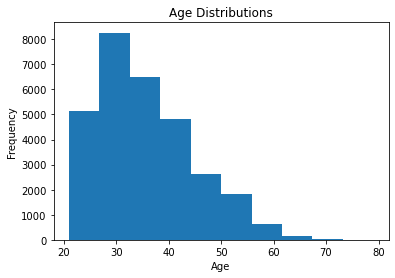

In [17]:
fig, ax = plt.subplots()

#########
ax.hist(df['Age'])
ax.set_xlabel('Age') 
ax.set_ylabel('Frequency') 
ax.set_title('Age Distributions') 

plt.show()

In [18]:
mean_age = df['Age'].mean()
median_age = df['Age'].median()
age_mode = df['Age'].mode()
print(f'mean age:{mean_age} median age: {median_age} age mode: {age_mode}')

mean age:35.4855 median age: 34.0 age mode: 0    29
dtype: int64


No handles with labels found to put in legend.


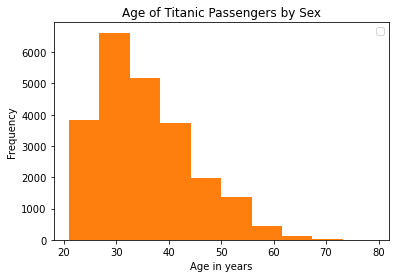

In [19]:
#Check the distribution between age and defaulted
Df_default = df[df['Default_status'] == 1]
Df_no_default = df[df['Default_status'] == 0]

fig, ax = plt.subplots()

ax.hist(Df_default['Age'])
ax.hist(Df_no_default['Age'])

ax.set_xlabel('Age in years') 
ax.set_ylabel('Frequency') 
ax.set_title('Age of Titanic Passengers by Sex') 

ax.legend()

plt.show()

<AxesSubplot:xlabel='Mar_status', ylabel='Default_status'>

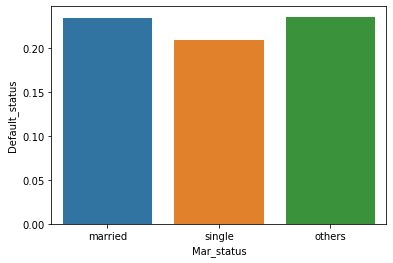

In [20]:
#Find the relationship between marital status and default
import seaborn as sns
sns.barplot(x = 'Mar_status', y = 'Default_status', data = df, ci = None)

<AxesSubplot:xlabel='Default_status', ylabel='Age'>

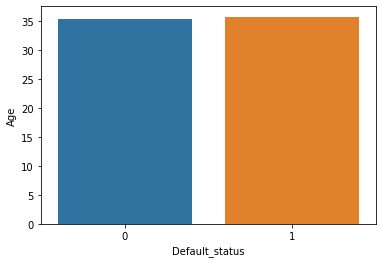

In [21]:
#Find the relationship between Age and default
import seaborn as sns
sns.barplot(x = 'Default_status', y = 'Age', data = df, ci = None)

<AxesSubplot:xlabel='Education_lvl', ylabel='Default_status'>

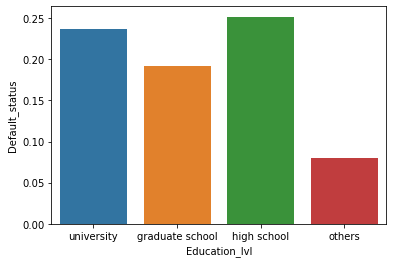

In [22]:
#Find the relationship between education level and default
sns.barplot(x = 'Education_lvl', y = 'Default_status', data = df, ci = None)

Text(0.5, 1.0, 'Frequency of Education level of credit holders')

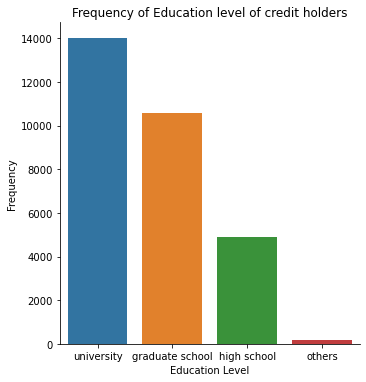

In [23]:
#plot using Seaborn

import matplotlib.pyplot as plt
sns.catplot(x = 'Education_lvl', data = df, kind='count')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Frequency of Education level of credit holders')

In [24]:
#Find the
import dash


### Machine Learning Models
***This is a Classification Problem, so we will try these three machine learning models:***
`The target variable is Default_status`
**<p>Logistic Regression</p>**
**<p>Decisionn Tree</p>**
**<p>XGBoost</p>**



In [25]:
#Establish a baseline Accuracy
#Check the distribution of the target variable which is the default status

df['Default_status'].value_counts(normalize = True)*100

0    77.88
1    22.12
Name: Default_status, dtype: float64

**The class is imbalanced since we have: `We will use accuracy and confucion metrics to evaluate out model`
<p>(1) 77.9% people defaulted </p>
<p>(2) 22.1% people did not default </p>

### Split Data into Train and Test sets ```we will use cross validation technique```


In [26]:
target = 'Default_status'
y = df[target]
X = df.drop(columns = target)
print(y.shape)
print(X.shape)

(30000,)
(30000, 14)


In [27]:
#import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)
print('X_train shape:', X_train.shape, 'X_test shape:', X_test.shape, 'y_train shape:', y_train.shape, 'y_test:', y_test.shape)

X_train shape: (24000, 14) X_test shape: (6000, 14) y_train shape: (24000,) y_test: (6000,)


# Classifcation Models


In [28]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix

#### Logistic Regression Model

In [29]:
clf_lr = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    SimpleImputer(strategy = 'mean'),
    LogisticRegression()
)

#### Decision Tree Classifier

In [30]:
clf_dt = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(random_state = 42),
)

#### Randform Forest Classifier

In [31]:

clf_rf =  make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state = 42)
)

### XGBoost Classifier

In [32]:
clf_xgb = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(
        random_state = 42,
        n_jobs = -1)
)


### Evaluation Metrics

In [33]:
#Create out Baseline Metrics
print('Baseline Accuracy:', y_train.value_counts(normalize = True).max())

Baseline Accuracy: 0.7782083333333333


In [34]:
#print('Training accuracy score:', model_lin.score(X_train, y_train))
#print('Validation accuracy score:', model_lin.score(X_val, y_val))

In [35]:
from sklearn.model_selection import KFold, cross_val_score
k = 5
cv_scores_dt = cross_val_score(clf_dt, X_train, y_train, cv = k)
cv_scores_rf = cross_val_score(clf_rf, X_train, y_train, cv = k)
cv_scores_lr = cross_val_score(clf_lr, X_train, y_train, cv = k)
cv_scores_xgb = cross_val_score(clf_xgb, X_train, y_train, cv = k);

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders

[18:03:32] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:03:34] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:03:36] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:03:39] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:03:41] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [36]:
print('CV scores Logistic Regression Classifier')
print(cv_scores_lr)
print('Mean CV accuracy score:', cv_scores_lr.mean())
print('STD CV accuracy score:', cv_scores_lr.std())

CV scores Logistic Regression Classifier
[0.77833333 0.77833333 0.778125   0.778125   0.778125  ]
Mean CV accuracy score: 0.7782083333333334
STD CV accuracy score: 0.00010206207261598171


In [37]:
print('CV scores DecisionTreeClassifier')
print(cv_scores_dt)
print('Mean CV accuracy score:', cv_scores_dt.mean())
print('STD CV accuracy score:', cv_scores_dt.std())

CV scores DecisionTreeClassifier
[0.72520833 0.735      0.71958333 0.73145833 0.73375   ]
Mean CV accuracy score: 0.729
STD CV accuracy score: 0.005790617410950225


In [38]:
print('CV scores RandomForestClassifier')
print(cv_scores_rf)
print('Mean CV accuracy score:', cv_scores_rf.mean())
print('STD CV accuracy score:', cv_scores_rf.std())

CV scores RandomForestClassifier
[0.81       0.81729167 0.81604167 0.811875   0.80916667]
Mean CV accuracy score: 0.812875
STD CV accuracy score: 0.0032419772773211258


In [39]:
print('CV scores XGBClassifier')
print(cv_scores_xgb)
print('Mean CV accuracy score:', cv_scores_xgb.mean())
print('STD CV accuracy score:', cv_scores_xgb.std())

CV scores XGBClassifier
[0.809375   0.815625   0.815625   0.815      0.80895833]
Mean CV accuracy score: 0.8129166666666666
STD CV accuracy score: 0.0030731814857643137


In [40]:
#print the results of all the models
#from sklearn.metrics import roc_auc_score
#roc_auc_score(y_val, y_pred_proba)
#for model in [clf_lr, clf_dt, clf_rf, clf_xgb]:
    #print(type(model))
    #print('Cross Validation score for: ', roc_auc_score(model, y_test, model.predict(X_test)))
    #print()

# Hyper paramter search and optmization

### Hyper parameter for Random Forest


In [41]:
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


In [42]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {
    'randomforestclassifier__min_samples_leaf': [1, 3, 10],    
    'simpleimputer__strategy': ['mean', 'median'], 
    #'randomforestclassifier__class_weight':{'balanced', 'balanced_subsample'},
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': uniform(0, 1), 
}

In [43]:
#Plug in the values to Randomised search
model_rf = RandomizedSearchCV(
    clf_rf, 
    param_distributions=param_dist, 
    n_iter=25, 
    cv=3, 
   # scoring = 'roc_auc'
    verbose=1, 
    n_jobs = -1
)


In [44]:
model_rf.fit(X_train, y_train);

Fitting 3 folds for each of 25 candidates, totalling 75 fits


In [45]:
best_score = model_rf.best_score_
best_params = model_rf.best_params_

print('Best score for `model`:', best_score)
print('Best params for `model`:', best_params)

Best score for `model`: 0.8210000000000001
Best params for `model`: {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 0.522636556510661, 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__n_estimators': 468, 'simpleimputer__strategy': 'median'}


### Rebuild the model with the best selected parameters and features


In [46]:
clf_rf_best =  make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy = 'mean'),
    RandomForestClassifier(max_depth = 5, max_features = 0.4496043503110737, 
                           min_samples_leaf = 3, n_estimators = 248, random_state = 42)
)

clf_rf_best.fit(X_train, y_train);

In [47]:
k = 5
cv_scores_rf2 = cross_val_score(clf_rf_best, X_train, y_train, cv = k)
print('CV scores for the Best RandomForestClassifier')
print(cv_scores_rf2)
print('Mean CV accuracy score:', cv_scores_rf2.mean())
print('STD CV accuracy score:', cv_scores_rf2.std())

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders

CV scores for the Best RandomForestClassifier
[0.82375    0.82625    0.81895833 0.81916667 0.81625   ]
Mean CV accuracy score: 0.820875
STD CV accuracy score: 0.0036094013046179484


In [48]:
#Get the test score for the Random Forest classifier
from sklearn.metrics import roc_auc_score
print('Cross Validation score for XGBClassifier: ', 
      roc_auc_score(y_test, clf_rf_best.predict(X_test)));

Cross Validation score for XGBClassifier:  0.6505138664397369


### Feature Importance for Random Forest Classifier

In [49]:

rf = clf_rf_best.named_steps['randomforestclassifier']
feat_importance = pd.Series(rf.feature_importances_, X_train.columns)
feat_importance.sort_values()

Gender           0.000929
Education_lvl    0.001412
Mar_status       0.001634
Age              0.007533
Bal              0.014817
Pay_April        0.016975
Limit_Bal        0.017100
Pay_May          0.026351
Total_bill       0.030600
Total_paid       0.044850
Pay_June         0.052494
Pay_July         0.094837
Pay_Aug          0.220358
Pay_Sept         0.470110
dtype: float64

<AxesSubplot:title={'center':'Top 10 features'}>

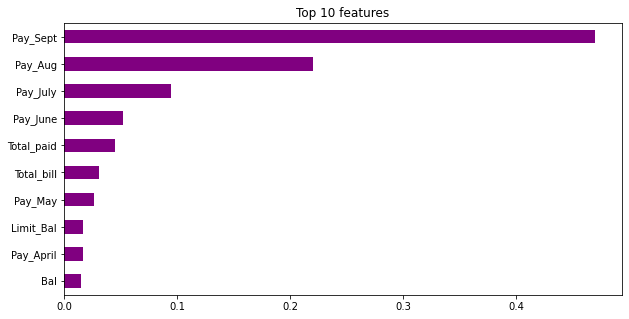

In [50]:
import matplotlib.pyplot as plt
# Plot top n feature importances
n = 10
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
feat_importance.sort_values()[-n:].plot.barh(color = 'purple')

### Hyper parameter for XGBoost

In [51]:
xgb_params = {
    'simpleimputer__strategy': ['mean', 'median'],
    'xgbclassifier__scale_pos_weight':[0, 1],
    'xgbclassifier__max_depth': [10, 20, 50, 100, None],
    'xgbclassifier__n_estimators': randint(100, 1000),
    'xgbclassifier__learning_rate':[0.01, 0.1, 0.2, 0.3]
}


In [52]:
model_xgb = RandomizedSearchCV(
    clf_xgb, 
    param_distributions=xgb_params,
    n_iter=5, 
    cv=3, 
    scoring = 'roc_auc',
    verbose=1, 
    n_jobs = -1
)

model_xgb.fit(X_train, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:16:12] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [53]:
print('Best hyperparameters', model_xgb.best_params_)
print('Cross-validation ROC_AUC', model_xgb.best_score_)

Best hyperparameters {'simpleimputer__strategy': 'mean', 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__max_depth': 20, 'xgbclassifier__n_estimators': 980, 'xgbclassifier__scale_pos_weight': 1}
Cross-validation ROC_AUC 0.7505581762559831


#### Build another XGBoost model with the selected hyperparameters

In [54]:
clf_xgb = model_xgb.best_estimator_
clf_xgb

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Education_lvl', 'Mar_status'],
                                mapping=[{'col': 'Education_lvl',
                                          'data_type': dtype('O'),
                                          'mapping': university         1
NaN                2
graduate school    3
high school        4
others             5
dtype: int64},
                                         {'col': 'Mar_status',
                                          'data_type': dtype('O'),
                                          'mapping': single     1
married    2
others     3
NaN       -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('xgbclas...
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, m

In [55]:
best_xgb = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy = 'mean'),
    XGBClassifier(
        learning_rate = 0.01,
        max_depth = None,
        n_estimators = 512,
        scale_pos_weight = 1,
        random_state = 42,
        n_jobs = -1)
)

best_xgb.fit(X_train, y_train);

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:19:12] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [56]:
#Get the test score
print('Cross Validation score for XGBClassifier: ', 
      roc_auc_score(y_test, best_xgb.predict(X_test)));

Cross Validation score for XGBClassifier:  0.6519142493757343


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [57]:
xgb = best_xgb.named_steps['xgbclassifier']
feat_importance = pd.Series(xgb.feature_importances_, X_train.columns)
feat_importance.sort_values()

Gender           0.014554
Age              0.014976
Mar_status       0.016458
Education_lvl    0.016734
Bal              0.018738
Total_bill       0.021335
Limit_Bal        0.021743
Pay_May          0.024641
Pay_April        0.027245
Total_paid       0.029047
Pay_June         0.040836
Pay_July         0.042119
Pay_Aug          0.144501
Pay_Sept         0.567073
dtype: float32

In [58]:
#let us see the detailed result of XGBClassifier
#pd.DataFrame(model_xgb.cv_results_).sort_values(by='rank_test_score').T

#### Make Predictions


In [59]:
 #make prediction using hyperparameters of random forest classifier
pred = clf_rf_best.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
#Check the test score
#test_score = clf_rf_best.score(y_test, pred)
y_test.shape

(6000,)

In [61]:
df.describe()

,Limit_Bal,Gender,Age,Pay_Sept,Pay_Aug,Pay_July,Pay_June,Pay_May,Pay_April,Default_status,Total_bill,Total_paid,Bal
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04
mean,167484.322667,1.603733,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,0.221200,3.131246e+05,3.165139e+04,2.814732e+05
std,129747.661567,0.489129,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,0.415062,4.419401e+05,6.082768e+04,4.246824e+05
min,10000.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,-3.353610e+05,0.000000e+00,-2.465583e+06
25%,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,3.262875e+04,6.679750e+03,9.285250e+03
50%,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.458810e+05,1.438300e+04,1.213965e+05
75%,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.966655e+05,3.350350e+04,3.602008e+05
max,1000000.000000,2.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000,6.155469e+06,3.764066e+06,5.007666e+06


In [62]:
df['Education_lvl'].value_counts()

university         14030
graduate school    10585
high school         4917
others               188
Name: Education_lvl, dtype: int64

#### Model Interpretation

In [63]:
from pdpbox.pdp import pdp_isolate, pdp_plot


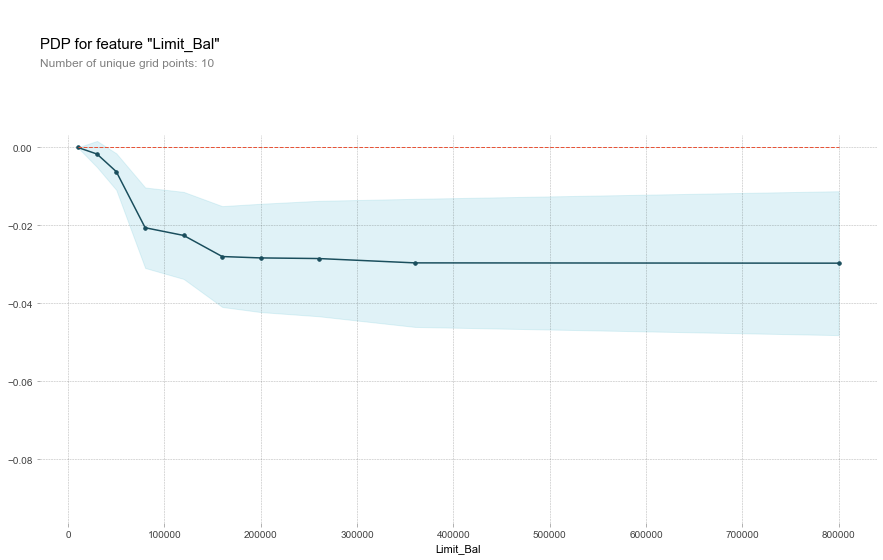

In [64]:
feature = 'Limit_Bal'

#isolate
isolate = pdp_isolate(model = clf_rf_best,
                      dataset = X_test,
                      model_features = X_test.columns,
                      feature = feature )

pdp_plot(isolate, feature_name = feature );

In [65]:
###ccreate another model for Pdp Plot
# Use Ordinal Encoder, outside of a pipeline
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_encoded, y_train);

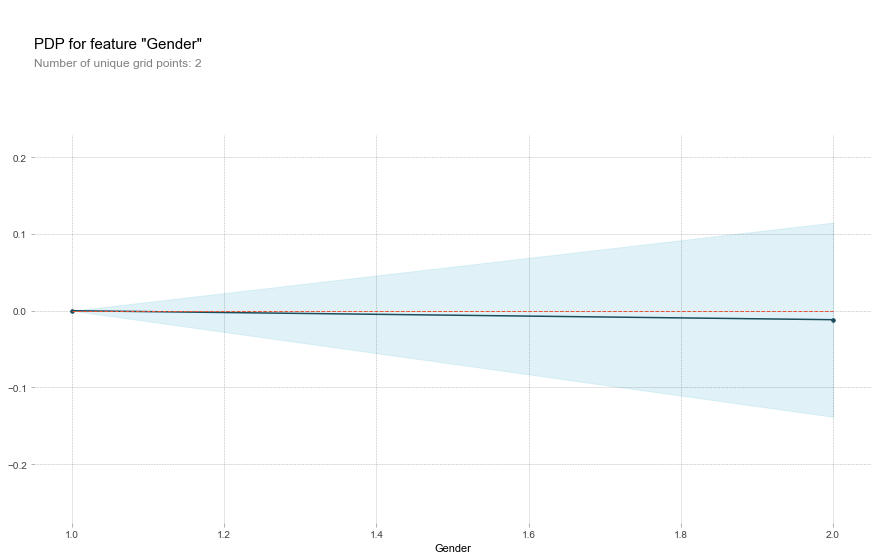

In [66]:
# Use Pdpbox
features = df.columns.drop(['Default_status'])
%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'Gender'
pdp_dist = pdp.pdp_isolate(model=rf_model, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

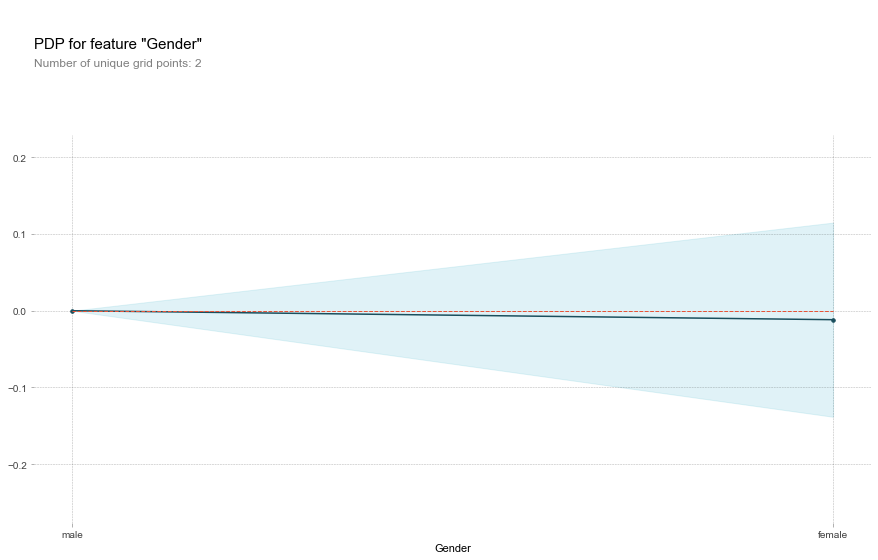

In [67]:
pdp.pdp_plot(pdp_dist, feature)

# Manually change the xticks labels
plt.xticks([1, 2], ['male', 'female']);

In [68]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
from pdpbox import pdp

In [70]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
#X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train)] 
            #(X_val_processed, y_val)]

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.77133
[1]	validation_0-auc:0.77708
[2]	validation_0-auc:0.78407
[3]	validation_0-auc:0.79177
[4]	validation_0-auc:0.79617
[5]	validation_0-auc:0.79978
[6]	validation_0-auc:0.80210
[7]	validation_0-auc:0.80461
[8]	validation_0-auc:0.80636
[9]	validation_0-auc:0.80959
[10]	validation_0-auc:0.81107
[11]	validation_0-auc:0.81340
[12]	validation_0-auc:0.81703
[13]	validation_0-auc:0.81956
[14]	validation_0-auc:0.82093
[15]	validation_0-auc:0.82501
[16]	validation_0-auc:0.82544
[17]	validation_0-auc:0.82698
[18]	validation_0-auc:0.82905
[19]	validation_0-auc:0.82990
[20]	validation_0-auc:0.83104
[21]	validation_0-auc:0.83350
[22]	validation_0-auc:0.83542
[23]	validation_0-auc:0.83578
[24]	validation_0-auc:0.83744
[25]	validation_0-auc:0.83796
[26]	validation_0-auc:0.83914
[27]	validation_0-auc:0.84155
[28]	validation_0-auc:0.84189
[29]	validation_0-auc:0.84261
[30]	validation_0-auc:0.84323
[31]	validation_0-auc:0.84396
[32]	validation_0-auc:0.84573
[33]	validation_0-au

[267]	validation_0-auc:0.96806
[268]	validation_0-auc:0.96829
[269]	validation_0-auc:0.96854
[270]	validation_0-auc:0.96876
[271]	validation_0-auc:0.96930
[272]	validation_0-auc:0.96942
[273]	validation_0-auc:0.96960
[274]	validation_0-auc:0.96981
[275]	validation_0-auc:0.97009
[276]	validation_0-auc:0.97018
[277]	validation_0-auc:0.97040
[278]	validation_0-auc:0.97047
[279]	validation_0-auc:0.97086
[280]	validation_0-auc:0.97117
[281]	validation_0-auc:0.97144
[282]	validation_0-auc:0.97167
[283]	validation_0-auc:0.97172
[284]	validation_0-auc:0.97190
[285]	validation_0-auc:0.97201
[286]	validation_0-auc:0.97205
[287]	validation_0-auc:0.97221
[288]	validation_0-auc:0.97228
[289]	validation_0-auc:0.97236
[290]	validation_0-auc:0.97258
[291]	validation_0-auc:0.97275
[292]	validation_0-auc:0.97277
[293]	validation_0-auc:0.97277
[294]	validation_0-auc:0.97293
[295]	validation_0-auc:0.97316
[296]	validation_0-auc:0.97316
[297]	validation_0-auc:0.97317
[298]	validation_0-auc:0.97327
[299]	va

[532]	validation_0-auc:0.99505
[533]	validation_0-auc:0.99508
[534]	validation_0-auc:0.99514
[535]	validation_0-auc:0.99516
[536]	validation_0-auc:0.99516
[537]	validation_0-auc:0.99517
[538]	validation_0-auc:0.99517
[539]	validation_0-auc:0.99518
[540]	validation_0-auc:0.99518
[541]	validation_0-auc:0.99521
[542]	validation_0-auc:0.99526
[543]	validation_0-auc:0.99532
[544]	validation_0-auc:0.99536
[545]	validation_0-auc:0.99537
[546]	validation_0-auc:0.99539
[547]	validation_0-auc:0.99540
[548]	validation_0-auc:0.99545
[549]	validation_0-auc:0.99551
[550]	validation_0-auc:0.99552
[551]	validation_0-auc:0.99552
[552]	validation_0-auc:0.99554
[553]	validation_0-auc:0.99557
[554]	validation_0-auc:0.99559
[555]	validation_0-auc:0.99559
[556]	validation_0-auc:0.99561
[557]	validation_0-auc:0.99570
[558]	validation_0-auc:0.99577
[559]	validation_0-auc:0.99580
[560]	validation_0-auc:0.99581
[561]	validation_0-auc:0.99581
[562]	validation_0-auc:0.99582
[563]	validation_0-auc:0.99583
[564]	va

[797]	validation_0-auc:0.99909
[798]	validation_0-auc:0.99910
[799]	validation_0-auc:0.99910
[800]	validation_0-auc:0.99910
[801]	validation_0-auc:0.99910
[802]	validation_0-auc:0.99910
[803]	validation_0-auc:0.99910
[804]	validation_0-auc:0.99911
[805]	validation_0-auc:0.99911
[806]	validation_0-auc:0.99911
[807]	validation_0-auc:0.99911
[808]	validation_0-auc:0.99911
[809]	validation_0-auc:0.99912
[810]	validation_0-auc:0.99912
[811]	validation_0-auc:0.99912
[812]	validation_0-auc:0.99912
[813]	validation_0-auc:0.99912
[814]	validation_0-auc:0.99912
[815]	validation_0-auc:0.99913
[816]	validation_0-auc:0.99913
[817]	validation_0-auc:0.99914
[818]	validation_0-auc:0.99914
[819]	validation_0-auc:0.99915
[820]	validation_0-auc:0.99915
[821]	validation_0-auc:0.99915
[822]	validation_0-auc:0.99915
[823]	validation_0-auc:0.99915
[824]	validation_0-auc:0.99915
[825]	validation_0-auc:0.99915
[826]	validation_0-auc:0.99915
[827]	validation_0-auc:0.99916
[828]	validation_0-auc:0.99916
[829]	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

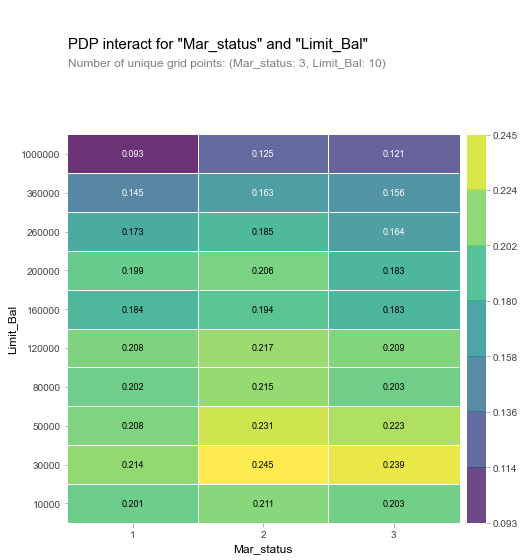

In [72]:
features = ['Mar_status', 'Limit_Bal']

interaction = pdp_interact(
    model=model, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [73]:
# Let's automate it

feature = 'Mar_status'
for item in encoder.mapping:
    if item['col'] == feature:
        feature_mapping = item['mapping']
        
feature_mapping = feature_mapping[feature_mapping.index.dropna()]
category_names = feature_mapping.index.tolist()
category_codes = feature_mapping.values.tolist()

In [ ]:
pdp = interaction.pdp.pivot_table(
    values='preds', 
    columns=features[0], # First feature on x axis
    index=features[1]    # Next feature on y axis
)[::-1]  # Reverse the index order so y axis is ascending

pdp = pdp.rename(columns=dict(zip(category_codes, category_names)))
plt.figure(figsize=(10,8))
sns.heatmap(pdp, annot=True, fmt='.2f', cmap='viridis')
plt.title('Partial Dependence of Credit Card Default, on Mar_status & Limit_Bal');

##### Explain individual predictions with shapley value plots

In [74]:
# GET THE AUC ROC SCORE FOR CLASS 1


from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test)
class_index = 1
y_pred_proba = model.predict_proba(X_test_processed)[:, class_index]
print(f'Test ROC AUC for class {class_index}:')
print(roc_auc_score(y_test, y_pred_proba)) # Ranges from 0-1, higher is better

Test ROC AUC for class 1:
0.7269609139115483


In [75]:
# To explain the prediction for test observation with index #3094, 
# first, get all of the features for that observation
row = X_test.iloc[[2078]]
row

,Limit_Bal,Gender,Education_lvl,Mar_status,Age,Pay_Sept,Pay_Aug,Pay_July,Pay_June,Pay_May,Pay_April,Total_bill,Total_paid,Bal
ID,,,,,,,,,,,,,,
20834,20000,1,university,married,47,0,0,0,2,2,2,93678,6500,87178


In [76]:
#Lets see the acutal prediction
y_test.iloc[[2078]]

ID
20834    1
Name: Default_status, dtype: int64

In [77]:
# GET THE SHAP VALUE FOR MACHINE LEARNING EXPLAINABILITY
import shap

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' # For classification, this shows predicted probabilities
)

In [78]:
feature_names = row.columns
feature_values = row.values[0]
shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

In [79]:
pros = shaps.sort_values(ascending=False)[:3].index
cons = shaps.sort_values(ascending=True)[:3].index

In [81]:
print('Top 3 reasons for Defaulting:')
for i, pro in enumerate(pros, start=1):
    feature_name, feature_value = pro
    print(f'{i}. {feature_name} is {feature_value}.')

print('\n')
print('Cons:')
for i, con in enumerate(cons, start=1):
    feature_name, feature_value = con
    print(f'{i}. {feature_name} is {feature_value}.')

Top 3 reasons for Defaulting:
1. Total_bill is 93678.
2. Limit_Bal is 20000.
3. Pay_June is 2.


Cons:
1. Pay_Sept is 0.
2. Total_paid is 6500.
3. Age is 47.


In [80]:
def explain(row_number):
    positive_class = 'Default'
    positive_class_index = 1

    # Get & process the data for the row
    row = X_test.iloc[[row_number]]
    row_processed = processor.transform(row)

    # Make predictions (includes predicted probability)
    pred = model.predict(row_processed)[0]
    pred_proba = model.predict_proba(row_processed)[0, positive_class_index]
    pred_proba *= 100
    if pred != positive_class:
        pred_proba = 100 - pred_proba

    # Show prediction & probability
    print(f'The model predicts {pred}, with {pred_proba:.0f}% probability.')
    
    # Get shapley additive explanations
    shap_values = explainer.shap_values(row_processed)

    # Get top 3 "pros & cons" for fully paid
    feature_names = row.columns
    feature_values = row.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
    pros = shaps.sort_values(ascending=False)[:3].index
    cons = shaps.sort_values(ascending=True)[:3].index

    # Show top 3 reason for prediction
    print('\n')
    print('Top 3 reasons for prediction:')
    evidence = pros if pred == positive_class else cons
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} is {feature_value}.')

    # Show top 1 counter-argument against prediction
    print('\n')
    print('Top counter-argument against prediction:')
    evidence = cons if pred == positive_class else pros
    feature_name, feature_value = evidence[0]
    print(f'- {feature_name} is {feature_value}.')

    # Show Shapley Values Force Plot
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=row, 
        link='logit' # For classification, this shows predicted probabilities
    )

explain(3068)

The model predicts 0, with 97% probability.


Top 3 reasons for prediction:
1. Total_paid is 49179.
2. Pay_Sept is -1.
3. Age is 42.


Top counter-argument against prediction:
- Total_bill is 41301.


#### Permutation Importance

In [82]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_encoded, y_train)
eli5.show_weights(perm, feature_names = X_encoded.columns.tolist())

Weight,Feature
0.1204 ± 0.0037,Total_bill
0.1128 ± 0.0011,Total_paid
0.1116 ± 0.0021,Bal
0.0823 ± 0.0016,Pay_Sept
0.0688 ± 0.0004,Limit_Bal
0.0634 ± 0.0026,Age
0.0171 ± 0.0007,Education_lvl
0.0132 ± 0.0008,Pay_Aug
0.0123 ± 0.0009,Pay_July
0.0120 ± 0.0009,Pay_April
